In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.utils import setSeeds

setSeeds()

# RiiiD 데이터셋 path 설정
PATH = '../../data'

# 데이터셋 불러오기
train_df = pd.read_csv(os.path.join(PATH, 'train_data.csv'))
test_df = pd.read_csv(os.path.join(PATH, 'test_data.csv'))

In [2]:
test_user_id = test_df['userID'].unique()

In [3]:
train_df = pd.concat([pd.read_csv(os.path.join(PATH, 'train_data.csv')), test_df]).reset_index(drop=True)

In [4]:
train_df = train_df.sort_values(['userID', 'Timestamp'])

## Preprocessing

### `assessmentItemID`, `testId` 분리 feature 생성

In [5]:
train_df['assessmentItemID_last'] = train_df['assessmentItemID'].apply(lambda x: x[-3:]).astype(str)
train_df['testId_first'] = train_df['testId'].apply(lambda x: x[2]).astype(str)
train_df['testId_last'] = train_df['testId'].apply(lambda x: x[-3:]).astype(str)

In [6]:
train_df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,assessmentItemID_last,testId_first,testId_last
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,001,6,001
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,002,6,001
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,003,6,001
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,004,6,001
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,005,6,001


### category to index
- `assessmentItemID`, `testId`, `KnowledgeTag`, `assessmentItemID_last`, `testId_first`, `testId_last`

In [7]:
cate2id_dict = {}

# 0은 nan이 사용한다
offset = 0

# assessmentItemID
assessment2id = dict([(v, i+offset) for i, v in enumerate(train_df['assessmentItemID'].unique())])
cate2id_dict['assessment2id'] = assessment2id
offset += len(assessment2id)

# testId
test2id = dict([(v, i+offset) for i, v in enumerate(train_df['testId'].unique())])
cate2id_dict['test2id'] = test2id
offset += len(test2id)

# KnowledgeTag
tag2id = dict([(v, i+offset) for i, v in enumerate(train_df['KnowledgeTag'].unique())])
cate2id_dict['tag2id'] = tag2id
offset += len(tag2id)

# assessmentItemID_last
assessment_last2id = dict([(v, i+offset) for i, v in enumerate(train_df['assessmentItemID_last'].unique())])
cate2id_dict['assessment_last2id'] = assessment_last2id
offset += len(assessment_last2id)

# testId_first
test_first2id = dict([(v, i+offset) for i, v in enumerate(train_df['testId_first'].unique())])
cate2id_dict['test_first2id'] = test_first2id
offset += len(test_first2id)

# testId_last
test_last2id = dict([(v, i+offset) for i, v in enumerate(train_df['testId_last'].unique())])
cate2id_dict['test_last2id'] = test_last2id
offset += len(test_last2id)

In [8]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

In [9]:
train_df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,assessmentItemID_last,testId_first,testId_last
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,001,6,001
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,002,6,001
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,003,6,001
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,004,6,001
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,005,6,001


In [10]:
# mapping
train_df['assessmentItemID'] = train_df['assessmentItemID'].map(assessment2id)
train_df['testId'] = train_df['testId'].map(test2id)
train_df['KnowledgeTag'] = train_df['KnowledgeTag'].map(tag2id)
train_df['assessmentItemID_last'] = train_df['assessmentItemID_last'].map(assessment_last2id)
train_df['testId_first'] = train_df['testId_first'].map(test_first2id)
train_df['testId_last'] = train_df['testId_last'].map(test_last2id)

In [11]:
train_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,assessmentItemID_last,testId_first,testId_last
0,0,0,9454,1,2020-03-24 00:17:11,10991,11903,11916,11925
1,0,1,9454,1,2020-03-24 00:17:14,10992,11904,11916,11925
2,0,2,9454,1,2020-03-24 00:17:22,10992,11905,11916,11925
3,0,3,9454,1,2020-03-24 00:17:29,10992,11906,11916,11925
4,0,4,9454,1,2020-03-24 00:17:36,10992,11907,11916,11925
...,...,...,...,...,...,...,...,...,...
2266581,7441,4501,10167,0,2020-06-05 06:50:21,11658,11907,11921,12082
2266582,7441,1286,9653,1,2020-08-21 01:06:39,11265,11903,11919,12049
2266583,7441,1287,9653,1,2020-08-21 01:06:50,11265,11904,11919,12049
2266584,7441,1288,9653,1,2020-08-21 01:07:36,11265,11905,11919,12049


### feature engineering

#### `Timestamp` -> `elapsed`
- 이상치 처리 필요


In [7]:
train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'])

In [8]:
time_diff = train_df.groupby(['userID', 'testId'], group_keys=True)['Timestamp'].diff().fillna(pd.Timedelta(seconds=0))
train_df['elapsed'] = time_diff.apply(lambda x: x.total_seconds())


In [9]:
train_df['elapsed'].describe()

count    2.526700e+06
mean     1.432391e+04
std      3.547058e+05
min      0.000000e+00
25%      3.000000e+00
50%      2.000000e+01
75%      5.400000e+01
max      2.869588e+07
Name: elapsed, dtype: float64

#### 정답률 feature 생성
- `assessmentItemID`
- `testId`
- `KnowledgeTag`
- `assessmentItemID_last`
- `testId_first`
- `testId_last`


In [10]:
accuracy_by_assessment = train_df[train_df['answerCode']!=-1].groupby('assessmentItemID')['answerCode'].mean()
accuracy_by_test = train_df[train_df['answerCode']!=-1].groupby('testId')['answerCode'].mean()
accuracy_by_tag = train_df[train_df['answerCode']!=-1].groupby('KnowledgeTag')['answerCode'].mean()
accuracy_by_assessment_last = train_df[train_df['answerCode']!=-1].groupby('assessmentItemID_last')['answerCode'].mean()
accuracy_by_test_first = train_df[train_df['answerCode']!=-1].groupby('testId_first')['answerCode'].mean()
accuracy_by_test_last = train_df[train_df['answerCode']!=-1].groupby('testId_last')['answerCode'].mean()

In [11]:
train_df['accuracy_by_assessment'] = train_df['assessmentItemID'].map(accuracy_by_assessment)
train_df['accuracy_by_test'] = train_df['testId'].map(accuracy_by_test)
train_df['accuracy_by_tag'] = train_df['KnowledgeTag'].map(accuracy_by_tag)
train_df['accuracy_by_assessment_last'] = train_df['assessmentItemID_last'].map(accuracy_by_assessment_last)
train_df['accuracy_by_test_first'] = train_df['testId_first'].map(accuracy_by_test_first)
train_df['accuracy_by_test_last'] = train_df['testId_last'].map(accuracy_by_test_last)

In [12]:
train_df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,assessmentItemID_last,testId_first,testId_last,elapsed,accuracy_by_assessment,accuracy_by_test,accuracy_by_tag,accuracy_by_assessment_last,accuracy_by_test_first,accuracy_by_test_last
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,001,6,001,0.0,0.984,0.952667,0.957333,0.749694,0.712279,0.708478
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,002,6,001,3.0,0.968,0.952667,0.917067,0.720312,0.712279,0.708478
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,003,6,001,8.0,0.916,0.952667,0.917067,0.688360,0.712279,0.708478
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,004,6,001,7.0,0.972,0.952667,0.917067,0.663597,0.712279,0.708478
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,005,6,001,7.0,0.948,0.952667,0.917067,0.599375,0.712279,0.708478


#### 상대적 (relative) feature 생성
> `answerCode`와 문제 종류별 평균 정답률인 `accuracy_by_assessment`를 빼서 상대적인 정보를 얻는다.

1. 문제를 맞았을 경우 (answerCode : 1)
    - 문제가 쉬울 경우 (accuracy_by_assessment : 0.9) 결과는 `0.1`
    - 문제가 어려울 경우 (accuracy_by_assessment : 0.2) 결과는 `0.8`
2. 문제를 틀렸을 경우 (answerCode : 0)
    - 문제가 쉬울 경우 (accuracy_by_assessment : 0.9) 결과는 `-0.9`
    - 문제가 어려울 경우 (accuracy_by_assessment : 0.2) 결과는 `-0.2`

값은 -1에서 +1 사이로 주어지며 학생의 상대적인 실력을 표현할 수 있는 feature다.
<br><br>

- 예측시 정답 여부 알 수 없기 때문에 생성할 수 없는 feature
- 이 feature를 활용해 과거 (prior) feature 생성

In [13]:
train_df['relative_answered_correctly'] = train_df['answerCode'] - train_df['accuracy_by_assessment']

#### `과거 (prior)` feature 생성
> 주어진 데이터 이전의 (prior) 데이터들의 통계값을 활용하는 feature를 생성한다

- 이전 문제 정답률
- 이전 문제 상대적인(relative) 정답률
- 각 문제 종류별로 이전에 몇번 풀었는지
- 각 파트별로 이전에 몇번 풀었는지
- 각 태그별로 이전에 몇번 풀었는지

In [14]:
# 이전 문제 정답 횟수
train_df['prior_ac_count'] = train_df.groupby('userID')['answerCode'].cumsum().shift(fill_value=0)

# 이전에 푼 문제 수
train_df['prior_quest_count'] = train_df.groupby('userID')['answerCode'].cumcount()

# 이전 문제 정답률
train_df['prior_ac_accuracy'] = (train_df['prior_ac_count'] / train_df['prior_quest_count']).fillna(0)

In [15]:
# 이전 문제 상대적인(relative) 정답률
train_df['prior_relative_ac_sum'] = train_df.groupby('userID')['relative_answered_correctly'].cumsum().shift(fill_value=0)
train_df['prior_relative_accuracy'] = (train_df['prior_relative_ac_sum'] / train_df['prior_quest_count']).fillna(0)

In [16]:
# 각 문제 종류별로 이전에 몇번 풀었는지 (중복으로 푼 문제수)
# 1번 문제 3번 풀었다 / 3번 문제 1번 풀었다 ..etc
# clip(0, 255)는 메모리를 위해 uint8 데이터 타입을 쓰기 위함
train_df['prior_assessment_frequency'] = train_df.groupby(['userID', 'assessmentItemID']).cumcount().clip(0, 255)

# 각 파트별로 이전에 몇번 풀었는지
train_df['prior_test_frequency'] = train_df.groupby(['userID', 'testId']).cumcount()

# 각 태그별로 이전에 몇번 풀었는지
train_df['prior_tags_frequency'] = train_df.groupby(['userID', 'KnowledgeTag']).cumcount()

In [17]:
features = ['prior_ac_accuracy',
            'prior_ac_count',
            'prior_quest_count',
            'prior_relative_ac_sum',
            'prior_relative_accuracy']
# 각 학생의 첫 row는 prior과 lagtime feature의 값을 0으로 초기화한다
train_df.loc[train_df['userID'].diff().fillna(1)>0, features] = 0

#### `바로전 (previous)` feature 생성
> 주어진 데이터 바로 이전의 (previous) 데이터 활용하는 feature를 생성한다

- 각 문제 종류별 마지막으로 푼 시점으로부터 지난 시간
- 각 문제 종류별 마지막으로 풀었을때 정답 여부

In [18]:
# 각 문제 종류별 마지막으로 푼 시간
prev_tags_timestamp = train_df.groupby(['userID', 'KnowledgeTag'])[['Timestamp']].shift()        

# 각 문제 종류별 마지막으로 푼 시점으로부터 지난 시간
# 해당 문제 종류를 마지막으로 푼 시점으로부터 시간이 오래 지날수록 문제를 맞추기 힘들 것이다
train_df['diff_time_btw_tags'] = (train_df['Timestamp'] - prev_tags_timestamp['Timestamp']).apply(lambda x: x.total_seconds())

# nan값은 [ diff_time_btw_content_ids ] 데이터 중 최대값으로 imputation을 한다
max_diff_time_btw_tags = train_df['diff_time_btw_tags'].max()
train_df['diff_time_btw_tags'] = train_df['diff_time_btw_tags'].fillna(max_diff_time_btw_tags)          

In [19]:
max_diff_time_btw_tags/60/60/24 # 약 304일?

304.8742824074074

In [20]:
# 각 문제 종류별 마지막으로 풀었을때 정답 여부
prev_correct_ac = train_df.groupby(['userID', 'KnowledgeTag'])[['answerCode']].shift()        
train_df['prev_tag_answer'] = prev_correct_ac['answerCode'].fillna(0)

### Transform

In [21]:
log_trans_features = ['elapsed', 'prior_ac_count', 'prior_quest_count', 'prior_assessment_frequency', 'prior_test_frequency', 'prior_tags_frequency', 'diff_time_btw_tags']

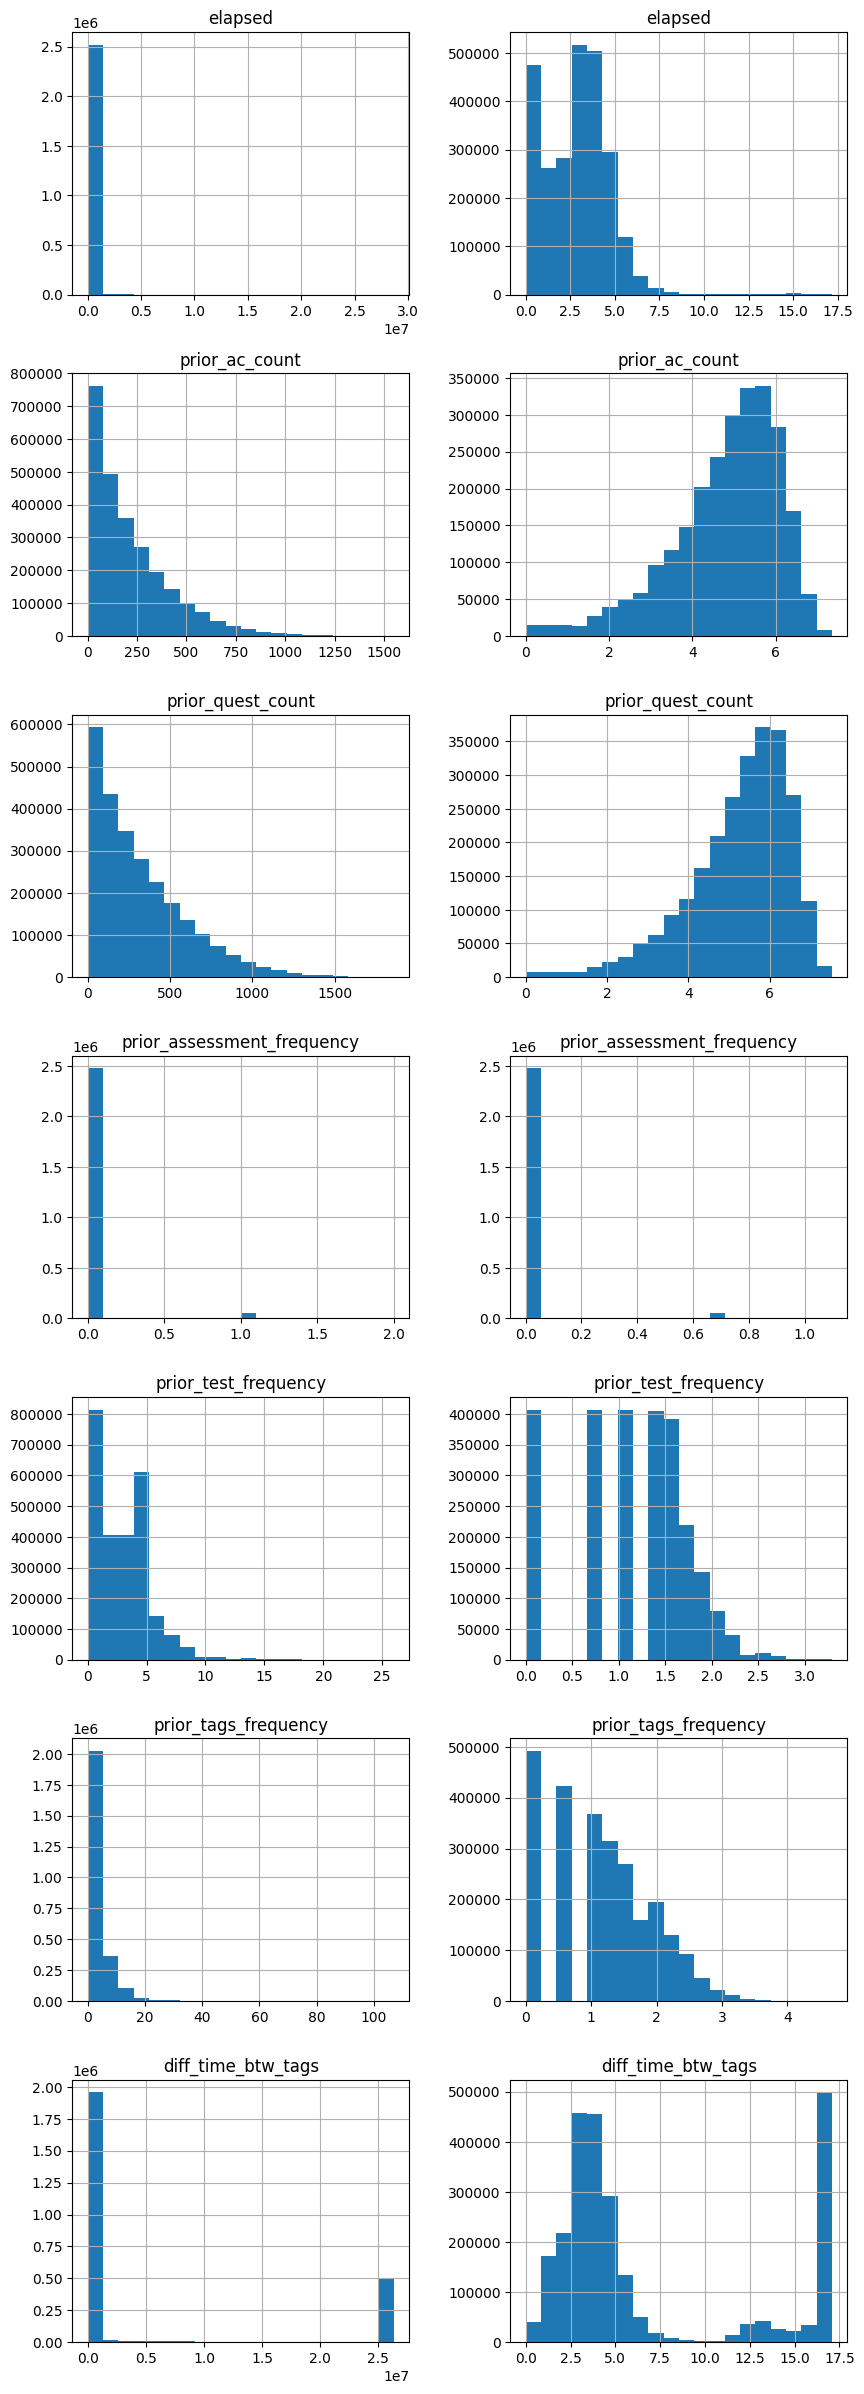

In [22]:
fig, axes = plt.subplots(len(log_trans_features), 2, figsize=(10,30))
for i, f in enumerate(log_trans_features):
    train_df[f].hist(bins=20, ax=axes[i, 0])
    axes[i, 0].set_title(f)

    pd.DataFrame(np.log1p(train_df[f])).hist(bins=20, ax=axes[i,1])
    # axes[i,1].set_yscale('log')
    axes[i,1].set_title(f)

In [23]:
train_df[log_trans_features] = np.log1p(train_df[log_trans_features])

### 범주형/수치형 feature 데이터 타입 변환

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2526700 entries, 0 to 2266585
Data columns (total 27 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   userID                       int64         
 1   assessmentItemID             object        
 2   testId                       object        
 3   answerCode                   int64         
 4   Timestamp                    datetime64[ns]
 5   KnowledgeTag                 int64         
 6   assessmentItemID_last        object        
 7   testId_first                 object        
 8   testId_last                  object        
 9   elapsed                      float64       
 10  accuracy_by_assessment       float64       
 11  accuracy_by_test             float64       
 12  accuracy_by_tag              float64       
 13  accuracy_by_assessment_last  float64       
 14  accuracy_by_test_first       float64       
 15  accuracy_by_test_last        float64       
 16  

In [38]:
# train_df.drop('Timestamp', axis=1, inplace=True)

In [39]:
train_df.columns

Index(['userID', 'assessmentItemID', 'testId', 'answerCode', 'Timestamp',
       'KnowledgeTag', 'assessmentItemID_last', 'testId_first', 'testId_last',
       'elapsed', 'accuracy_by_assessment', 'accuracy_by_test',
       'accuracy_by_tag', 'accuracy_by_assessment_last',
       'accuracy_by_test_first', 'accuracy_by_test_last',
       'relative_answered_correctly', 'prior_ac_count', 'prior_quest_count',
       'prior_ac_accuracy', 'prior_relative_ac_sum', 'prior_relative_accuracy',
       'prior_assessment_frequency', 'prior_test_frequency',
       'prior_tags_frequency', 'diff_time_btw_tags', 'prev_tag_answer'],
      dtype='object')

In [43]:
cont_cols = [
    'elapsed',
    'accuracy_by_assessment', 'accuracy_by_test', 'accuracy_by_tag',
    'accuracy_by_assessment_last', 'accuracy_by_test_first',
    'accuracy_by_test_last', 
    'prior_ac_count', 'prior_quest_count', 'prior_ac_accuracy',
    'prior_relative_ac_sum', 'prior_relative_accuracy',
    'prior_assessment_frequency', 'prior_test_frequency',
    'prior_tags_frequency', 'diff_time_btw_tags', 'prev_tag_answer',
    'relative_answered_correctly', 'answerCode'
]
cate_cols = [
    'assessmentItemID', 'testId', 'KnowledgeTag',
       'assessmentItemID_last', 'testId_first', 'testId_last'
]

In [44]:
offset

12123

In [45]:
train_df[cate_cols] = train_df[cate_cols].astype(np.int16) # -32768 ~ 32767
train_df[cont_cols] = train_df[cont_cols].astype(np.float32)

### train, valid, test 분리

In [25]:
train_df.to_csv("../../data/total.csv", index=False)

In [26]:
# train test 다시 분리
train = train_df[~train_df['userID'].isin(test_user_id)].reset_index(drop=True)
test = train_df[train_df['userID'].isin(test_user_id)].reset_index(drop=True)

In [27]:
train.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,assessmentItemID_last,testId_first,testId_last,elapsed,...,prior_ac_count,prior_quest_count,prior_ac_accuracy,prior_relative_ac_sum,prior_relative_accuracy,prior_assessment_frequency,prior_test_frequency,prior_tags_frequency,diff_time_btw_tags,prev_tag_answer
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,001,6,001,0.000000,...,0.000000,0.000000,0.0,0.000,0.000,0.0,0.000000,0.000000,17.086642,0.0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,002,6,001,1.386294,...,0.693147,0.693147,1.0,0.016,0.016,0.0,0.693147,0.000000,17.086642,0.0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,003,6,001,2.197225,...,1.098612,1.098612,1.0,0.048,0.024,0.0,1.098612,0.693147,2.197225,1.0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,004,6,001,2.079442,...,1.386294,1.386294,1.0,0.132,0.044,0.0,1.386294,1.098612,2.079442,1.0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,005,6,001,2.079442,...,1.609438,1.609438,1.0,0.160,0.040,0.0,1.609438,1.386294,2.079442,1.0


In [28]:
train.to_csv('../../data/train_feature_engineering.csv', index=False)
test.to_csv('../../data/test_feature_engineering.csv', index=False)

In [54]:
(test_df['answerCode']!=test['answerCode']).sum()

0

In [48]:
test

,row_id,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,assessmentItemID_last,testId_first,testId_last,...,prior_ac_count,prior_quest_count,prior_ac_accuracy,prior_relative_ac_sum,prior_relative_accuracy,prior_assessment_frequency,prior_test_frequency,prior_tags_frequency,diff_time_btw_tags,prev_tag_answer
0,0,3,1900,9759,1.0,2020-01-09 10:56:31,11364,11903,11922,12025,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,17.086643,0.0
1,1,3,1901,9759,1.0,2020-01-09 10:56:57,11364,11904,11922,12025,...,0.693147,0.693147,1.000000,0.340000,0.340000,0.0,0.693147,0.693147,3.295837,1.0
2,2,3,1902,9759,0.0,2020-01-09 10:58:31,11365,11905,11922,12025,...,1.098612,1.098612,1.000000,0.720000,0.360000,0.0,1.098612,0.000000,17.086643,0.0
3,3,3,1903,9759,0.0,2020-01-09 10:58:36,11365,11906,11922,12025,...,1.098612,1.386294,0.666667,0.172000,0.057333,0.0,1.386294,0.693147,1.791759,0.0
4,4,3,1904,9759,0.0,2020-01-09 10:58:43,11366,11909,11922,12025,...,1.098612,1.609438,0.500000,-0.464000,-0.116000,0.0,1.609438,0.000000,17.086643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260109,260109,7439,5952,10408,0.0,2020-10-14 23:07:23,11281,11903,11919,12098,...,2.197225,2.484907,0.727273,-0.786353,-0.071487,0.0,0.000000,0.000000,17.086643,0.0
260110,260110,7439,5953,10408,1.0,2020-10-14 23:07:41,11281,11904,11919,12098,...,2.197225,2.564949,0.666667,-1.223020,-0.101918,0.0,0.693147,0.693147,2.944439,0.0
260111,260111,7439,5954,10408,1.0,2020-10-14 23:08:02,11283,11905,11919,12098,...,2.302585,2.639057,0.692308,-0.706353,-0.054335,0.0,1.098612,0.000000,17.086643,0.0
260112,260112,7439,5955,10408,1.0,2020-10-14 23:09:31,11283,11906,11919,12098,...,2.397895,2.708050,0.714286,-0.553020,-0.039501,0.0,1.386294,0.693147,4.499810,1.0


In [47]:
import torch
def get_row_ids(df, max_seq_len):
    # 데이터 증강을 위한 row_id 저장 -> dataset 생성시 활용
    df = df.reset_index().rename({'index':'row_id'}, axis=1)
    # 학습 과정에서 학습 샘플을 생성하기 위해서 필요한 유저별 row_ids를 저장
    question_row_ids_by_user_id = df.groupby('userID').apply(lambda x: x['row_id'].values)
    user_id_len = question_row_ids_by_user_id.apply(len)
    user_id_row_id_list = []
    for user_id, row_ids in question_row_ids_by_user_id.items():
        if len(row_ids) <= max_seq_len:
            user_id_row_id_list.append((user_id, row_ids[0]))
        else:
            for row_id in row_ids[:-(max_seq_len-1)]:
                user_id_row_id_list.append((user_id, row_id))

    return user_id_len, user_id_row_id_list
    
class DKTDataset(torch.utils.data.Dataset):
    def __init__(self, data, max_seq_len, cate_cols, cont_cols):

        self.max_seq_len = max_seq_len
        
        self.user_id_len, self.user_id_row_id_list = get_row_ids(data, self.max_seq_len)

        self.cate_cols = cate_cols
        self.cont_cols = cont_cols
        
        self.cate_features = data[self.cate_cols].values
        self.cont_features = data[self.cont_cols].values
        self.target = data['answerCode'].values

    def __getitem__(self, index):
        user_id, start_row_id = self.user_id_row_id_list[index]
        try:
            _, end_row_id = self.user_id_row_id_list[index+1]
        except:
            end_row_id = start_row_id + self.user_id_len[user_id]
        seq_len = end_row_id - start_row_id

        # 0으로 채워진 output tensor 제작
        cate_feature = torch.zeros(self.max_seq_len, len(self.cate_cols), dtype=torch.long)
        cont_feature = torch.zeros(self.max_seq_len, len(self.cont_cols), dtype=torch.float)
        target = torch.FloatTensor(self.max_seq_len)
        mask = torch.zeros(self.max_seq_len, dtype=torch.int16)

        # tensor에 값 채워넣기
        cate_feature[-seq_len:] = torch.ShortTensor(self.cate_features[start_row_id:end_row_id])
        cont_feature[-seq_len:] = torch.HalfTensor(self.cont_features[start_row_id:end_row_id])
        target[-seq_len:] = torch.HalfTensor(self.target[start_row_id:end_row_id])
        mask[-seq_len:] = 1     
        
        return cate_feature, cont_feature, mask, target


In [48]:
train_db = DKTDataset(train, 20, cate_cols, cont_cols)

In [57]:
target = torch.FloatTensor(20)
target

tensor([3.3654e-34, 0.0000e+00, 2.3910e-35, 0.0000e+00, 2.6680e+27, 4.5621e-41,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.4013e-45, 0.0000e+00])

In [49]:
# sequence 데이터 하나의 shape을 살펴보자
for cate_x, cont_x, mask, target in train_db:
    print(f"category size : {cate_x.size()}")
    print(f"continous size : {cont_x.size()}")
    print(f"mask size : {mask.size()}")
    print(f"target size : {target.size()}")
    break

category size : torch.Size([20, 6])
continous size : torch.Size([20, 17])
mask size : torch.Size([20])
target size : torch.Size([20])


In [38]:
train.to_csv('../../data/train_feature_engineering.csv', index=False)
test.to_csv('../../data/test_feature_engineering.csv', index=False)

In [34]:
# train, valid 분리
n = len(train['userID'].unique())
n_ratio = 0.7
user_permute_list = np.random.permutation(train['userID'].unique())
train_userid = user_permute_list[:(int(n*n_ratio))]
valid_userid = user_permute_list[(int(n*n_ratio)):]
valid = train[train['userID'].isin(valid_userid)].reset_index(drop=True).reset_index().rename({'index':'row_id'}, axis=1)
train = train[train['userID'].isin(train_userid)].reset_index(drop=True).reset_index().rename({'index':'row_id'}, axis=1)

## 📗 CFG (Configuration) class
> 모든 설정 값을 관리하는 CFG 클래스다. 이를 통해 다양한 실험을 손쉽게 관리가능하다. 우리는 input, output에 목적을 두고 있는만큼 모델과 데이터셋에 관련된 configuration 값들만을 사용한다. 

In [35]:
class CFG:
    seed=7
    device='gpu'

    batch_size=128

    dropout=0.2
    emb_size=100
    hidden_size=128
    nlayers=2
    nheads=8
  
    seq_len=32
    target_size=1

    # 학습
    n_epochs = 20
    lr = 0.0001
    clip_grad = 10
    patience = 5
    log_steps = 50

    optimizer = 'adam'
    scheduler = 'plateau'

    model_dir = 'models/'
    output_dir = 'output/'


In [36]:
CFG.total_cate_size = offset
CFG.cate_cols = cate_features
CFG.cont_cols = cont_features

CFG.cate_col_size = len(cate_features)
CFG.cont_col_size = len(cont_features)

## 📗 데이터셋 및 데이터 로더 (Dataset and DataLoader)
> 전처리에서 생성한 데이터들을 토대로 훈련에 바로 사용할 수 있는 데이터셋을 만들자. 우리는 여기서 범주형, 수치형 데이터로 나눠 출력한다! 아래를 살펴보면서 이렇게 출력된 데이터를 어떻게 embedding할 수 있을지 잠시 고민해보자!

### 🟡 데이터 증강 (Data Augmentation)을 위한 index 목록
> 따로 augmentation이라고 표현하진 않았지만 여기서 사용되는 데이터셋 코드에는 augmentation이 적용되어있다. 이를 사용하기 위한 index 목록을 만들기 위해 아래와 같은 과정을 거친다.

In [37]:
# train

# 학습 과정에서 학습 샘플을 생성하기 위해서 필요한 유저별 row_ids를 저장
train_question_row_ids_by_user_id = train.groupby('userID').apply(lambda x: x['row_id'].values)
train_question_row_ids_by_user_id.reset_index().head()
# 학습 과정에서 학습 샘플을 생성하기 위해서 필요한 유저별 시작 row_id를 저장
train_start_row_id_by_user_id = train.groupby('userID').apply(lambda x: x['row_id'].values[0])
train_start_row_id_by_user_id.reset_index().head()

train_user_id_row_id_list = [(user_id, row_id)
                             for user_id, row_ids in train_question_row_ids_by_user_id.items()
                             for row_id in row_ids]
train_user_id_row_id_list[:10]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9)]

In [38]:
# valid

# 학습 과정에서 학습 샘플을 생성하기 위해서 필요한 유저별 row_ids를 저장
valid_question_row_ids_by_user_id = valid.groupby('userID').apply(lambda x: x['row_id'].values)
valid_question_row_ids_by_user_id.reset_index().head()
# 학습 과정에서 학습 샘플을 생성하기 위해서 필요한 유저별 시작 row_id를 저장
valid_start_row_id_by_user_id = valid.groupby('userID').apply(lambda x: x['row_id'].values[0])
valid_start_row_id_by_user_id.reset_index().head()

valid_user_id_row_id_list = [(user_id, row_id)
                             for user_id, row_ids in valid_question_row_ids_by_user_id.items()
                             for row_id in row_ids]
valid_user_id_row_id_list[:10]

[(1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9)]

In [41]:
# test

# 학습 과정에서 학습 샘플을 생성하기 위해서 필요한 유저별 row_ids를 저장
test_question_row_ids_by_user_id = test.groupby('userID').apply(lambda x: x['row_id'].values)
test_question_row_ids_by_user_id.reset_index().head()
# 학습 과정에서 학습 샘플을 생성하기 위해서 필요한 유저별 시작 row_id를 저장
test_start_row_id_by_user_id = test.groupby('userID').apply(lambda x: x['row_id'].values[0])
test_start_row_id_by_user_id.reset_index().head()

test_user_id_row_id_list = [(user_id, row_id)
                             for user_id, row_ids in test_question_row_ids_by_user_id.items()
                             for row_id in row_ids]
test_user_id_row_id_list[:10]

[(3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9)]

In [42]:
# configuration에 등록!
CFG.train_start_row_id_by_user_id = train_start_row_id_by_user_id
CFG.train_user_id_row_id_list = train_user_id_row_id_list

위와 같이 처리하는 이유는 각 학생의 sequence안에서 다양한 길이의 데이터를 사용하기 위함이다. 예시를 들자면 다음과 같다.

``` python
학생 A : [1, 2, 3, 4, 5]
```

이 경우에 `train_user_id_row_id_list`는 다음과 같이 표현된다.
``` python
[(A, 0),
 (A, 1),
 (A, 2),
 (A, 3),
 (A, 4)]
```

우리는 `start_row_id_by_user_id`를 통해 학생 A의 시작 `row_id`를 알고 있고 위의 `train_user_id_row_id_list`를 sequence가 끝나는 위치의 `row_id`라고 하면 다음과 같은 5개의 sequence 데이터를 훈련에 사용할 수 있다.

``` python
[1,     <pad>, <pad>, <pad>, <pad>]
[1,     2,     <pad>, <pad>, <pad>]
[1,     2,     3,     <pad>, <pad>]
[1,     2,     3,     4,     <pad>]
[1,     2,     3,     4,     5    ]
```
    

### 🟡 IscreamDataset / DataLoader

In [43]:
train[cate_features]

,assessmentItemID,testId,KnowledgeTag,assessmentItemID_last,testId_first,testId_last
0,0,9454,10991,11903,11916,11925
1,1,9454,10992,11904,11916,11925
2,2,9454,10992,11905,11916,11925
3,3,9454,10992,11906,11916,11925
4,4,9454,10992,11907,11916,11925
...,...,...,...,...,...,...
1576705,4501,10167,11658,11907,11921,12082
1576706,1286,9653,11265,11903,11919,12049
1576707,1287,9653,11265,11904,11919,12049
1576708,1288,9653,11265,11905,11919,12049


In [44]:
train[cont_features]

,elapsed,accuracy_by_assessment,accuracy_by_test,accuracy_by_tag,accuracy_by_assessment_last,accuracy_by_test_first,accuracy_by_test_last,prior_ac_count,prior_quest_count,prior_ac_accuracy,prior_relative_ac_sum,prior_relative_accuracy,prior_assessment_frequency,prior_test_frequency,prior_tags_frequency,diff_time_btw_tags,prev_tag_answer,relative_answered_correctly,answerCode
0,0.000000,0.984000,0.952667,0.957333,0.749694,0.712279,0.708478,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,17.086643,0.0,0.016000,1.0
1,1.386294,0.968000,0.952667,0.917067,0.720312,0.712279,0.708478,0.693147,0.693147,1.000000,0.016000,0.016000,0.0,0.693147,0.000000,17.086643,0.0,0.032000,1.0
2,2.197225,0.916000,0.952667,0.917067,0.688360,0.712279,0.708478,1.098612,1.098612,1.000000,0.048000,0.024000,0.0,1.098612,0.693147,2.197225,1.0,0.084000,1.0
3,2.079442,0.972000,0.952667,0.917067,0.663597,0.712279,0.708478,1.386294,1.386294,1.000000,0.132000,0.044000,0.0,1.386294,1.098612,2.079442,1.0,0.028000,1.0
4,2.079442,0.948000,0.952667,0.917067,0.599375,0.712279,0.708478,1.609438,1.609438,1.000000,0.160000,0.040000,0.0,1.609438,1.386294,2.079442,1.0,0.052000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576705,3.218876,0.446667,0.666000,0.694889,0.599375,0.702210,0.641616,0.693147,1.609438,0.250000,-1.883333,-0.470833,0.0,1.609438,1.609438,3.218876,0.0,-0.446667,0.0
1576706,0.000000,0.643333,0.653878,0.700029,0.749694,0.680256,0.709128,0.693147,1.791759,0.200000,-2.330000,-0.466000,0.0,0.000000,0.000000,17.086643,0.0,0.356667,1.0
1576707,2.484907,0.640000,0.653878,0.700029,0.720312,0.680256,0.709128,1.098612,1.945910,0.333333,-1.973333,-0.328889,0.0,0.693147,0.693147,2.484907,1.0,0.360000,1.0
1576708,3.850147,0.786667,0.653878,0.700029,0.688360,0.680256,0.709128,1.386294,2.079442,0.428571,-1.613333,-0.230476,0.0,1.098612,1.098612,3.850147,1.0,0.213333,1.0


In [45]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class IscreamDataset(Dataset):
    def __init__(self, df, cfg, user_id_row_id_list, start_row_id_by_user_id, max_seq_len=100, max_content_len=1000):        
        
        self.max_seq_len = max_seq_len
        self.max_content_len = max_content_len
        
        self.user_id_row_id_list = user_id_row_id_list
        self.start_row_id_by_user_id = start_row_id_by_user_id

        self.cate_cols = cfg.cate_cols
        self.cont_cols = cfg.cont_cols
        
        self.cate_features = df[self.cate_cols].values
        self.cont_features = df[self.cont_cols].values

    def __getitem__(self, idx):
        
        user_id, end_row_id = self.user_id_row_id_list[idx]
        end_row_id += 1
        
        start_row_id = self.start_row_id_by_user_id[user_id]
        start_row_id = max(end_row_id - self.max_seq_len, start_row_id) # lower bound
        seq_len = end_row_id - start_row_id

        # 0으로 채워진 output tensor 제작                  
        cate_feature = torch.zeros(self.max_seq_len, len(self.cate_cols), dtype=torch.long)
        cont_feature = torch.zeros(self.max_seq_len, len(self.cont_cols), dtype=torch.float)
        mask = torch.zeros(self.max_seq_len, dtype=torch.int16)
       
        # tensor에 값 채워넣기
        cate_feature[-seq_len:] = torch.ShortTensor(self.cate_features[start_row_id:end_row_id])
        cont_feature[-seq_len:] = torch.HalfTensor(self.cont_features[start_row_id:end_row_id])
        mask[-seq_len:] = 1        
            
        # answered_correctly가 cont_feature[-1]에 위치한다
        target = torch.FloatTensor([cont_feature[-1, -1]])

        # answered_correctly 및 relative_answered_correctly는
        # data leakage가 발생할 수 있으므로 0으로 모두 채운다
        cont_feature[-1, -1] = 0
        cont_feature[-1, -2] = 0
        
        return cate_feature, cont_feature, mask, target
        
    def __len__(self):
        return len(self.user_id_row_id_list)


In [46]:
train_db = IscreamDataset(train, CFG, train_user_id_row_id_list, train_start_row_id_by_user_id, max_seq_len=CFG.seq_len)
train_loader = DataLoader(train_db, batch_size=CFG.batch_size, shuffle=True,
                          drop_last=False, pin_memory=True)    
valid_db = IscreamDataset(valid, CFG, valid_user_id_row_id_list, valid_start_row_id_by_user_id, max_seq_len=CFG.seq_len)
valid_loader = DataLoader(valid_db, batch_size=CFG.batch_size, shuffle=True,
                          drop_last=False, pin_memory=True) 
test_db = IscreamDataset(test, CFG, test_user_id_row_id_list, test_start_row_id_by_user_id, max_seq_len=CFG.seq_len)
test_loader = DataLoader(test_db, batch_size=CFG.batch_size, shuffle=True,
                          drop_last=False, pin_memory=True) 

In [47]:
# sequence 데이터 하나의 shape을 살펴보자
for cate_x, cont_x, mask, target in train_db:
    print(f"category size : {cate_x.size()}")
    print(f"continous size : {cont_x.size()}")
    print(f"mask size : {mask.size()}")
    print(f"target size : {target.size()}")
    break

category size : torch.Size([32, 6])
continous size : torch.Size([32, 19])
mask size : torch.Size([32])
target size : torch.Size([1])


In [48]:
# 배치 단위로 주어지는 데이터를 살펴보자
for cate_x, cont_x, mask, target in train_loader:
    print(f"category size : {cate_x.size()}")
    print(f"continous size : {cont_x.size()}")
    print(f"mask size : {mask.size()}")
    print(f"target size : {target.size()}")
    break

category size : torch.Size([128, 32, 6])
continous size : torch.Size([128, 32, 19])
mask size : torch.Size([128, 32])
target size : torch.Size([128, 1])


## 📗 Transformer Input / Output 구현
> transformer에 입력시킬 input을 구현하고 transformer를 거친 output을 우리가 원하는 최종 출력값으로 바꾼다.

In [50]:
CFG.n_rows_per_step = 1

In [53]:
import torch.nn as nn

try:
    from transformers.modeling_bert import BertConfig, BertEncoder, BertModel    
except:
    from transformers.models.bert.modeling_bert import BertConfig, BertEncoder, BertModel   

class TransformerModel(nn.Module):
    def __init__(self, cfg):
        super(TransformerModel, self).__init__()
        self.cfg = cfg

        cate_col_size = len(cfg.cate_cols)
        cont_col_size = len(cfg.cont_cols)

        # category
        self.cate_emb = nn.Embedding(cfg.total_cate_size, cfg.emb_size, padding_idx=0)
        self.cate_proj = nn.Sequential(
            nn.Linear(cfg.emb_size * cfg.cate_col_size * cfg.n_rows_per_step, cfg.hidden_size),
            nn.LayerNorm(cfg.hidden_size),
        )

        # continuous
        self.cont_bn = nn.BatchNorm1d(cfg.cont_col_size)
        self.cont_emb = nn.Sequential(
            nn.Linear(cfg.cont_col_size*cfg.n_rows_per_step, cfg.hidden_size),
            nn.LayerNorm(cfg.hidden_size),
        )

        # combination
        self.comb_proj = nn.Sequential(
            nn.ReLU(),
            nn.Linear(cfg.hidden_size*2, cfg.hidden_size),
            nn.LayerNorm(cfg.hidden_size),
        )
        
        self.config = BertConfig( 
            3, # not used
            hidden_size=cfg.hidden_size,
            num_hidden_layers=cfg.nlayers,
            num_attention_heads=cfg.nheads,
            intermediate_size=cfg.hidden_size,
            hidden_dropout_prob=cfg.dropout,
            attention_probs_dropout_prob=cfg.dropout,
        )
        self.encoder = BertEncoder(self.config)        
        
        def get_reg():
            return nn.Sequential(
            nn.Linear(cfg.hidden_size, cfg.hidden_size),
            nn.LayerNorm(cfg.hidden_size),
            nn.Dropout(cfg.dropout),
            nn.ReLU(),            
            nn.Linear(cfg.hidden_size, cfg.target_size),
        )     
        self.reg_layer = get_reg()
        
    def forward(self, cate_x, cont_x, mask):        
        import pdb; pdb.set_trace()
        batch_size = cate_x.size(0)
        half_seq_len = cate_x.size(1) // self.cfg.n_rows_per_step
        
        # category
        cate_emb = self.cate_emb(cate_x).view(batch_size, half_seq_len, -1)
        cate_emb = self.cate_proj(cate_emb)

        # continuous
        cont_x = self.cont_bn(cont_x.view(-1, cont_x.size(-1))).view(batch_size, -1, cont_x.size(-1))
        cont_emb = self.cont_emb(cont_x)        
        
        # combination
        seq_emb = torch.cat([cate_emb, cont_emb], 2)        
        seq_emb = self.comb_proj(seq_emb)   
        
        mask, _ = mask.view(batch_size, half_seq_len, -1).max(2)
        
        extended_attention_mask = mask.unsqueeze(1).unsqueeze(2) # (batch size) x 1 x 1 x (max_seq_length)
        encoded_layers = self.encoder(seq_emb, attention_mask=extended_attention_mask)
        sequence_output = encoded_layers[0]
        sequence_output = sequence_output[:, -1]        
        
        pred_y = self.reg_layer(sequence_output)

        return pred_y


In [54]:
# 모델 생성
model = TransformerModel(CFG)

for cate_x, cont_x, mask, target in train_loader:
    print(f"category size : {cate_x.size()}")
    print(f"continous size : {cont_x.size()}")
    print(f"mask size : {mask.size()}\n")

    output = model(cate_x, cont_x, mask)
    
    print(f"output size : {output.size()}")
    print(f"target size : {target.size()}")
    break

category size : torch.Size([128, 32, 6])
continous size : torch.Size([128, 32, 19])
mask size : torch.Size([128, 32])

> /tmp/ipykernel_73672/439823091.py(60)forward()
     58     def forward(self, cate_x, cont_x, mask):
     59         import pdb; pdb.set_trace()
---> 60         batch_size = cate_x.size(0)
     61         half_seq_len = cate_x.size(1) // self.cfg.n_rows_per_step
     62 

> /tmp/ipykernel_73672/439823091.py(61)forward()
     59         import pdb; pdb.set_trace()
     60         batch_size = cate_x.size(0)
---> 61         half_seq_len = cate_x.size(1) // self.cfg.n_rows_per_step
     62 
     63         # category

> /tmp/ipykernel_73672/439823091.py(64)forward()
     62 
     63         # category
---> 64         cate_emb = self.cate_emb(cate_x).view(batch_size, half_seq_len, -1)
     65         cate_emb = self.cate_proj(cate_emb)
     66 

> /tmp/ipykernel_73672/439823091.py(65)forward()
     63         # category
     64         cate_emb = self.cate_emb(cate_x).vie

## train / valid / test 코드

In [50]:
import math
import os

import torch
import wandb
from tqdm import tqdm

from src.criterion import get_criterion
from src.metric import get_metric
from src.optimizer import get_optimizer
from src.scheduler import get_scheduler


def run(CFG, train_loader, valid_loader, model):

    # only when using warmup scheduler
    CFG.total_steps = int(math.ceil(len(train_loader.dataset) / CFG.batch_size)) * (
        CFG.n_epochs
    )
    CFG.warmup_steps = CFG.total_steps // 10

    optimizer = get_optimizer(model, CFG)
    scheduler = get_scheduler(optimizer, CFG)

    best_auc = -1
    early_stopping_counter = 0
    for epoch in range(CFG.n_epochs):

        print(f"Start Training: Epoch {epoch + 1}")

        ### TRAIN
        train_auc, train_acc, train_loss = train(
            train_loader, model, optimizer, scheduler, CFG
        )

        ### VALID
        auc, acc = validate(valid_loader, model, CFG)

        ### TODO: model save or early stopping
        # wandb.log(
        #     {
        #         "epoch": epoch,
        #         "train_loss_epoch": train_loss,
        #         "train_auc_epoch": train_auc,
        #         "train_acc_epoch": train_acc,
        #         "valid_auc_epoch": auc,
        #         "valid_acc_epoch": acc,
        #     }
        # )
        if auc > best_auc:
            best_auc = auc
            # torch.nn.DataParallel로 감싸진 경우 원래의 model을 가져옵니다.
            model_to_save = model.module if hasattr(model, "module") else model
            save_checkpoint(
                {
                    "epoch": epoch + 1,
                    "state_dict": model_to_save.state_dict(),
                },
                CFG.model_dir,
                "model.pt",
            )
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= CFG.patience:
                print(
                    f"EarlyStopping counter: {early_stopping_counter} out of {CFG.patience}"
                )
                break

        # scheduler
        if CFG.scheduler == "plateau":
            scheduler.step(best_auc)

def train(train_loader, model, optimizer, scheduler, CFG):
    model.train()

    total_preds = []
    total_targets = []
    losses = []
    for step, batch in tqdm(enumerate(train_loader), total=len(train_loader)):
        cate_x, cont_x, mask, target = batch
        preds = model(cate_x, cont_x, mask)
        targets = target  # correct

        loss = compute_loss(preds, targets)
        update_params(loss, model, optimizer, scheduler, CFG)

        # if step % CFG.log_steps == 0:
            # print(f"Training steps: {step} Loss: {str(loss.item())}")

        # predictions
        preds = preds[:, -1]
        targets = targets[:, -1]

        total_preds.append(preds.detach())
        total_targets.append(targets.detach())
        losses.append(loss)

    total_preds = torch.concat(total_preds).cpu().numpy()
    total_targets = torch.concat(total_targets).cpu().numpy()

    # Train AUC / ACC
    auc, acc = get_metric(total_targets, total_preds)
    loss_avg = sum(losses) / len(losses)
    print(f"TRAIN AUC : {auc} ACC : {acc}")
    return auc, acc, loss_avg

def validate(valid_loader, model, CFG):
    model.eval()

    total_preds = []
    total_targets = []
    for step, batch in tqdm(enumerate(valid_loader), total=len(valid_loader)):
        cate_x, cont_x, mask, target = batch
        preds = model(cate_x, cont_x, mask)
        targets = target  # correct

        # predictions
        preds = preds[:, -1]
        targets = targets[:, -1]

        total_preds.append(preds.detach())
        total_targets.append(targets.detach())

    total_preds = torch.concat(total_preds).cpu().numpy()
    total_targets = torch.concat(total_targets).cpu().numpy()

    # Train AUC / ACC
    auc, acc = get_metric(total_targets, total_preds)

    print(f"VALID AUC : {auc} ACC : {acc}\n")

    return auc, acc


def inference(CFG, test_loader, model):

    model.eval()

    total_preds = []

    for step, batch in tqdm(enumerate(test_loader), total=len(test_loader)):
        cate_x, cont_x, mask, target = batch
        preds = model(cate_x, cont_x, mask)

        # predictions
        preds = preds[:, -1]
        preds = preds.cpu().detach().numpy()
        total_preds += list(preds)

    write_path = os.path.join(CFG.output_dir, "submission.csv")
    if not os.path.exists(CFG.output_dir):
        os.makedirs(CFG.output_dir)
    with open(write_path, "w", encoding="utf8") as w:
        w.write("id,prediction\n")
        for id, p in enumerate(total_preds):
            w.write("{},{}\n".format(id, p))

# loss계산하고 parameter update!
def compute_loss(preds, targets):
    """
    Args :
        preds   : (batch_size, max_seq_len)
        targets : (batch_size, max_seq_len)

    """
    loss = get_criterion(preds, targets)

    # 마지막 시퀀드에 대한 값만 loss 계산
    loss = loss[:, -1]
    loss = torch.mean(loss)
    return loss


def update_params(loss, model, optimizer, scheduler, CFG):
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), CFG.clip_grad)
    if CFG.scheduler == "linear_warmup":
        scheduler.step()
    optimizer.step()
    optimizer.zero_grad()

def save_checkpoint(state, model_dir, model_filename):
    print("saving model ...")
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    torch.save(state, os.path.join(model_dir, model_filename))



In [51]:
# %env "WANDB_NOTEBOOK_NAME" "lecture_5_test.ipynb"

In [52]:
def class2dict(f):
    return dict(
        (name, getattr(f, name)) for name in dir(f) if not name.startswith("__")
    )

In [53]:
# wandb.login()
# wandb.init(project="dkt")
model = TransformerModel(CFG)
run(CFG, train_loader, valid_loader, model)

Start Training: Epoch 1


 21%|██        | 2540/12319 [27:05<1:44:18,  1.56it/s]   


KeyboardInterrupt: 